# Libraries

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt, log
from scipy.linalg import expm
import itertools
from math import cos, ceil
import time

In [2]:
from IPython.display import clear_output

In [3]:
#from Diff import *

In [4]:
!git clone https://github.com/equadratures/equadratures
clear_output()

In [5]:
new_code = '''
def hyperbolic_cross(orders):
    dimensions = len(orders)
    n = orders[0]
    I = np.arange(n+1)
    I = np.reshape(I, (1,-1))
    for k in range(2, dimensions+1):
        J = np.array([]).reshape((I.shape[0]+1, 0))
        for i in range(n+1):
            l = I.shape[1]
            for j in range(l):
                z = I[:,j]
                #z = np.reshape(z, (I.shape[0], 1))
                if (i+1)*np.prod(z+1) <= n+1:
                    z = np.row_stack((z.reshape((-1,1)), np.array([i]).reshape(1,1)))
                    J = np.hstack((J, z))
        I = J
    return I.T
'''

In [6]:
with open("/content/equadratures/equadratures/basis.py", "a") as file:
  file.write(new_code)

In [7]:
new_line_1 = '''        elif name == "hyperbolic-cross":
            basis = hyperbolic_cross(self.orders)
'''

# Open the file in read mode to read its contents
with open("/content/equadratures/equadratures/basis.py", 'r') as file:
    lines = file.readlines()

lines.insert(179, new_line_1)

# Open the file in write mode to overwrite its contents
with open("/content/equadratures/equadratures/basis.py", 'w') as file:
    file.writelines(lines)

new_line_2 = '''        elif name.lower() == "hyperbolic-cross":
            basis = hyperbolic_cross(self.orders)
'''

# Open the file in read mode to read its contents
with open("/content/equadratures/equadratures/basis.py", 'r') as file:
    lines = file.readlines()

lines.insert(93, new_line_2)

# Open the file in write mode to overwrite its contents
with open("/content/equadratures/equadratures/basis.py", 'w') as file:
    file.writelines(lines)

In [8]:
with open("/content/equadratures/equadratures/optimisation.py", "r") as file:
    fix_1 = file.read()

# Lines to modify in equadratures/optimisation.py

fix_1 = fix_1.replace('objective = lambda x: k*np.asscalar(f(x))', 'objective = lambda x: k*f(x).item()')
fix_1 = fix_1.replace('constraint = lambda x: np.asscalar(g(x))', 'constraint = lambda x: g(x).item()')
fix_1 = fix_1.replace('self.f_old = np.asscalar(self.f[ind_min])', 'self.f_old = self.f[ind_min].item()')
fix_1 = fix_1.replace('return np.asscalar(f)', 'return f.item()')
fix_1 = fix_1.replace('np.asscalar(my_poly.get_polyfit(x))', 'my_poly.get_polyfit(x).item()')
fix_1 = fix_1.replace('np.asscalar(my_poly.get_polyfit(np.dot(x,self.U)))', 'my_poly.get_polyfit(np.dot(x,self.U)).item()')
fix_1 = fix_1.replace('del_m = np.asscalar(my_poly.get_polyfit(self.s_old)) - m_new', 'del_m = np.ndarray.item(my_poly.get_polyfit(self.s_old)) - m_new')
fix_1 = fix_1.replace('del_m = np.asscalar(my_poly.get_polyfit(np.dot(self.s_old,self.U))) - m_new', 'del_m = np.ndarray.item(my_poly.get_polyfit(np.dot(self.s_old,self.U))) - m_new')

with open("/content/equadratures/equadratures/optimisation.py", "w") as file:
    file.write(fix_1)

In [9]:
with open("/content/equadratures/equadratures/sampling_methods/induced.py", "r") as file:
    fix_2 = file.read()

# Lines to modify in equadratures/sampling_methods/induced.py

fix_2 = fix_2.replace('F = np.asscalar(F)', 'F = F.item()')

with open("/content/equadratures/equadratures/sampling_methods/induced.py", "w") as file:
    file.write(fix_2)

In [10]:
with open("/content/equadratures/equadratures/solver.py", "r") as file:
    fix_3 = file.read()

# Lines to modify in equadratures/solver.py

fix_3 = fix_3.replace('fe = 0.5*(np.asscalar(np.dot(r.T,r)) - epsilon**2)', 'fe = 0.5*(np.dot(r.T,r).item() - epsilon**2)')
fix_3 = fix_3.replace('cqe = np.asscalar(np.dot(r.T,r)) - epsilon**2', 'cqe = np.dot(r.T,r).item() - epsilon**2')

with open("/content/equadratures/equadratures/solver.py", "w") as file:
    file.write(fix_3)

In [11]:
with open("/content/equadratures/equadratures/subspaces.py", "r") as file:
    fix_4 = file.read()

# Lines to modify in equadratures/subspaces.py

fix_4 = fix_4.replace('dV[:,l,:,j] = np.asscalar(vectord[l])*(X.T*current[:,j])', 'dV[:,l,:,j] = vectord[l].item()*(X.T*current[:,j])')

with open("/content/equadratures/equadratures/subspaces.py", "w") as file:
    file.write(fix_4)

In [12]:
import sys
sys.path.append('/content/equadratures')

import equadratures as eq

# MOSEK installation

In [13]:
!pip install Mosek
clear_output()

In [14]:
import os

root_dir = '/root/'
folder_name = 'mosek'

folder_path = os.path.join(root_dir, folder_name)

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_name}' created in '{root_dir}'.")
else:
    print(f"Folder '{folder_name}' already exists in '{root_dir}'.")

Folder 'mosek' created in '/root/'.


In [15]:
from google.colab import drive
import shutil

drive.mount('/content/drive')

root_dir = '/root/'
folder_name = 'mosek'

file_path_in_drive = '/content/drive/MyDrive/mosek.lic'

destination_path = os.path.join(root_dir, folder_name, os.path.basename(file_path_in_drive))

# Copy the file from Google Drive to Colab
shutil.copyfile(file_path_in_drive, destination_path)
print(f"File '{os.path.basename(file_path_in_drive)}' successfully copied to '{destination_path}'.")

# Unmount Google Drive
drive.flush_and_unmount()
print('Google Drive unmounted.')


Mounted at /content/drive
File 'mosek.lic' successfully copied to '/root/mosek/mosek.lic'.
Google Drive unmounted.


In [16]:
import cvxpy as cp
import mosek

# Testing equadratures...

## Figures 5.5 and 5.6

In [ ]:
d = 2

In [ ]:
def ed_diff_function(y):
  return exp(-1/(2*d) * np.sum(y))

In [ ]:
for i in range(2,36,2):
  print(eq.basis.Basis('hyperbolic-cross', orders=[i for _ in range(4)]).get_cardinality())

9
23
43
73
93
137
169
208
252
308
328
418
454
498
566
638
670


In [ ]:
s_HC = [eq.basis.Basis('hyperbolic-cross', orders=[i for _ in range(d)]).get_cardinality() for i in range(2,36,2)]
ords = [i for i in range(2,36,2)]

In [ ]:
s_HC

[5, 10, 16, 23, 29, 37, 45, 52, 60, 70, 76, 87, 95, 103, 113, 123, 131]

In [ ]:
get_average_rmse(120, 'least-squares', dim=d, simuls=1, ord=14)

8.051052846742047e-12

In [ ]:
multiplier = [1, 1.5, 2] if d==2 else [1, 1.25, 1.5, 2]
label = ['m=s', 'm=1.5s', 'm=2s', 'm=slog(s)', 'm=0.5s^2'] if d==2 else ['m=s', 'm=1.25s', 'm=1.5s', 'm=2s', 'm=slog(s)']

In [ ]:
Y = []

for a in multiplier:
  y = []
  for s in s_HC:
    y.append(get_average_rmse(int(a*s), 'least-squares', dim=d, basis='hyperbolic-cross', ord=ords[s_HC.index(s)]))
  Y.append(y)

In [ ]:
y_log = []
for s in s_HC:
  y_log.append(get_average_rmse(int(s*log(s)), 'least-squares', dim=d, basis='hyperbolic-cross', ord=ords[s_HC.index(s)]))
Y.append(y_log)

In [ ]:
y_sq = []
for s in s_HC:
  y_sq.append(get_average_rmse(int(0.5 * s**2), 'least-squares', dim=d, basis='hyperbolic-cross', ord=ords[s_HC.index(s)]))
Y.append(y_sq)

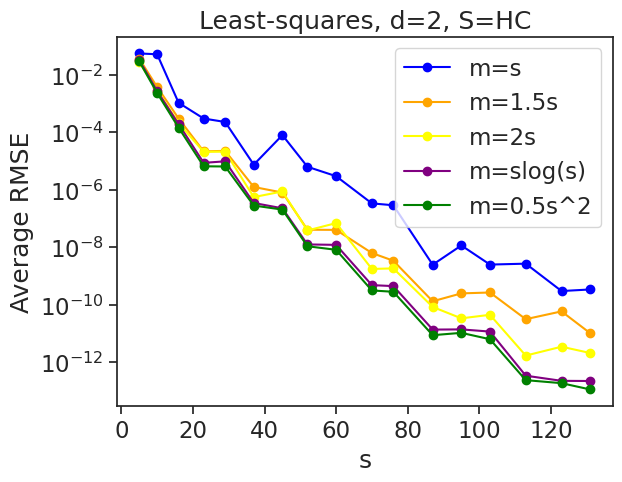

In [ ]:
color = ['blue', 'orange', 'yellow', 'purple', 'green']
#label = ['m=s', 'm=1.25s', 'm=1.5s', 'm=2s', 'm=slog(s)']
for i in range(len(Y)):
  plt.plot(s_HC, Y[i], color[i], label=label[i], marker='o')
  plt.xlabel('s')
  plt.ylabel('Average RMSE')
  plt.yscale('log')
  plt.title('Least-squares, d={}, S=HC'.format(d))
plt.legend()
plt.show()

## Figure 7.2

In [ ]:
print(cp.installed_solvers())

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'MOSEK', 'OSQP', 'SCIPY', 'SCS']


In [ ]:
print(cp.__version__)

1.3.4


In [17]:
solver = cp.SCS

In [33]:
## Example code from cvxpy documentation
## https://www.cvxpy.org/

'''
# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)
'''

def qcbp(A, b, eta=10e-5, **kwargs):
  n = A.shape[1]
  z = cp.Variable(n)
  b = np.reshape(b, (b.shape[0],))  # to avoid shape issues when defining the constraint
  #b = (1/sqrt(A.shape[0])) * b
  objective = cp.Minimize(cp.norm1(z))
  constraints = [cp.norm2(A@z-b) <= eta]
  prob = cp.Problem(objective, constraints)
  result = prob.solve(solver=solver)  # MOSEK not working (install problem)
  print('QCBP completed.')

  return z.value #.reshape((n,1))


def weighted_qcbp(A, b, eta=10e-5, **kwargs):
  n = A.shape[1]
  z = cp.Variable(n)
  b = np.reshape(b, (b.shape[0],))  # to avoid shape issues when defining the constraint
  #b = (1/sqrt(A.shape[0])) * b
  #print(w)
  objective = cp.Minimize(cp.norm1(w*z))
  constraints = [cp.norm2(A@z-b) <= eta]
  prob = cp.Problem(objective, constraints)
  result = prob.solve(solver=solver)  # MOSEK not working (install problem)
  print('Weighted QCBP completed.')

  return z.value #.reshape((n,1))


def lasso(A, b, **kwargs):
  n = A.shape[1]
  z = cp.Variable(n)
  b = np.reshape(b, (b.shape[0],))  # to avoid shape issues when defining the constraint
  #b = (1/sqrt(A.shape[0])) * b
  lmbd = 1/sqrt(25*A.shape[0])
  objective = cp.Minimize(cp.norm2(A@z-b) + lmbd*cp.norm1(z))
  prob = cp.Problem(objective)
  result = prob.solve(solver=solver)
  print('SR-LASSO completed.')

  return z.value #.reshape((n,1))


def weighted_lasso(A, b, **kwargs):
  n = A.shape[1]
  z = cp.Variable(n)
  b = np.reshape(b, (b.shape[0],))  # to avoid shape issues when defining the constraint
  #b = (1/sqrt(A.shape[0])) * b
  lmbd = 1/sqrt(25*A.shape[0])
  objective = cp.Minimize(cp.norm2(A@z-b) + lmbd*cp.norm1(w*z))
  prob = cp.Problem(objective)
  result = prob.solve(solver=solver)
  print('Weighted SR-LASSO completed.')

  return z.value #.reshape((n,1))

In [42]:
A = np.random.randn(15,15)
b = np.random.randn(15)

w = np.ones(15)

In [43]:
qcbp(A, b)

array([-2.33211704,  0.82681929, -2.05153834,  2.1873507 ,  0.29579834,
       -1.27220613,  1.44652539, -0.95346394, -0.16200937, -0.76990872,
        1.37527571, -2.36755839,  1.15487128, -1.44917212,  3.22281925])

In [44]:
weighted_qcbp(A, b, w)

array([-2.33216764,  0.82685969, -2.05153553,  2.18738299,  0.29581166,
       -1.2722017 ,  1.44657323, -0.95348859, -0.16198667, -0.76990357,
        1.37528696, -2.36757082,  1.15489322, -1.44919095,  3.22286605])

In [45]:
lasso(A, b)

array([-2.33214382,  0.82676935, -2.0518169 ,  2.18742548,  0.29580576,
       -1.27238726,  1.44644087, -0.9534441 , -0.16204771, -0.77007957,
        1.37545488, -2.36782121,  1.15486839, -1.44928752,  3.2229033 ])

In [46]:
weighted_lasso(A, b, w)

array([-2.33214284,  0.8267687 , -2.05180258,  2.18740031,  0.29582904,
       -1.2723911 ,  1.44644792, -0.95345717, -0.16211869, -0.77007285,
        1.37543742, -2.36780928,  1.15486959, -1.44929449,  3.22290106])

In [ ]:
I1 = eq.Basis('hyperbolic-cross', orders=[4 for _ in range(3)])
I1.get_elements().T

array([[0., 1., 2., 3., 4., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 2., 3., 4., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 2., 3., 4.]])

In [34]:
def get_average_custom(m, dim=3, simuls=5, basis='total-order', ord=4, solv=qcbp):
  errors = np.array([])
  my_param_list = [eq.Parameter(distribution='uniform', order=ord, lower=-1.0, upper=1.0) for i in range(dim)]

  if basis == 'hyperbolic-cross':
    my_basis = eq.Basis(basis, orders=[ord for _ in range(dim)])
  else:
    my_basis = eq.Basis(basis)

  #I = my_basis.get_elements().T
  #size_I = I.shape
  #weights = np.prod(np.sqrt(2 * I + np.ones(size_I)), axis=0)
  #w = np.ones(my_basis.get_cardinality())

  for j in range(simuls):

    X_train = np.random.uniform(-1, 1, size=(m, dim))
    y_train = eq.evaluate_model(X_train, ed_diff_function)
    if solv == qcbp or solv == weighted_qcbp:
      my_poly_ref = eq.Poly(my_param_list, my_basis, method='custom-solver',
            sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train})
      A = my_poly_ref.get_poly(X_train).T
      eta_opt = np.linalg.norm(A@c_ref - y_train)
      #print(eta_opt)
      my_poly = eq.Poly(my_param_list, my_basis, method='custom-solver',
          sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train},
            solver_args={'solve':solv, 'eta':eta_opt, 'verbose':False})
    else:
      my_poly = eq.Poly(my_param_list, my_basis, method='custom-solver',
          sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train},
            solver_args={'solve':solv, 'verbose':False})

    my_poly.set_model()

    test_pts = np.random.uniform(-1, 1, size=(1000, dim))
    test_evals = eq.evaluate_model(test_pts, ed_diff_function)
    train_r2, test_r2 = my_poly.get_polyscore(X_test=test_pts, y_test=test_evals, metric='rmse')
    train_r2, test_r2

    errors = np.append(errors, test_r2)

  return np.mean(errors)

In [35]:
def conv_custom(x, dim=3, simuls=5, basis='total-order', ord=4, method=qcbp, verbose=False):
  Y = []

  for element in x:
    if verbose:
      start = time.time()
    Y.append(get_average_custom(element, dim=dim, simuls=simuls, ord=ord, basis=basis, solv=method))
    if verbose:
      end = time.time()
      print('m={} w/ {}, done: {} seconds.'.format(element, str(method), end-start))

  return Y

In [21]:
d = int(input()) # 4, 8 or 16

if d == 4:
  def ed_diff_function(y):
    return exp(-1/(2*d) * np.sum(y))

  nb_samples = [10*i for i in range(1,26)]
  order = 43
elif d == 8:
  def ed_diff_function(y):
    num = np.prod(np.array([cos(16*y[i]/2**i) for i in range(ceil(d/2)+1, d)]))
    dem = np.prod(np.array([1 - y[i]/4**i for i in range(ceil(d/2)+1, d)]))
    return num/dem

  nb_samples = [20*i for i in range(1,26)]
  order = 22
elif d == 16:
  def ed_diff_function(y):
    return exp(-2/d * sum([(y[i] - ((-1)**i/(i+1)))**2 for i in range(d)]))

  nb_samples = [50*i for i in range(2,21)]
  order = 14

8


In [34]:
d

8

In [22]:
I = eq.Basis('hyperbolic-cross', orders=[order for _ in range(d)]).get_elements().T
size_I = I.shape
w = np.prod(np.sqrt(2 * I + np.ones(size_I)), axis=0)

In [36]:
w = np.ones(eq.Basis('hyperbolic-cross', orders=[order for _ in range(d)]).get_cardinality())

In [23]:
### Construct error grid, error matrix and error vector

err_grid_ratio = 0.1
#M = ceil(err_grid_ratio * eq.basis.Basis('hyperbolic-cross', orders=[order for _ in range(d)]).get_cardinality())
M = 10000
err_grid = np.random.uniform(-1, 1, size=(M, d))

# measurement matrix
bas = eq.Basis('hyperbolic-cross', orders=[order for _ in range(d)])
print(bas.get_cardinality())
poly = eq.Poly([eq.Parameter(distribution='uniform', order=order, lower=-1.0, upper=1.0) for _ in range(d)], bas)
A_err_grid = poly.get_poly(err_grid).T/sqrt(M)
b_err_grid = eq.evaluate_model(err_grid, ed_diff_function)/sqrt(M)

#print(A_err_grid.T@A_err_grid)

c_ref, _, _, _ = np.linalg.lstsq(A_err_grid, b_err_grid)

1843


In [ ]:
get_average_custom(100, dim=d, simuls=1, basis='hyperbolic-cross', ord=order)

(100, 998)
(998, 1)
(100, 1)
()


1.0195593793919935

In [37]:
y_1 = conv_custom(nb_samples, dim=d, simuls=1, basis='hyperbolic-cross', ord=order)

QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.
QCBP completed.


In [38]:
y_2 = conv_custom(nb_samples, dim=d, simuls=1, basis='hyperbolic-cross', ord=order, method=lasso)

SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.
SR-LASSO completed.


In [39]:
y_3 = conv_custom(nb_samples, dim=d, simuls=1, basis='hyperbolic-cross', ord=order, method=weighted_qcbp)

Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.
Weighted QCBP completed.


In [40]:
y_4 = conv_custom(nb_samples, dim=d, simuls=1, basis='hyperbolic-cross', ord=order, method=weighted_lasso)

Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.
Weighted SR-LASSO completed.


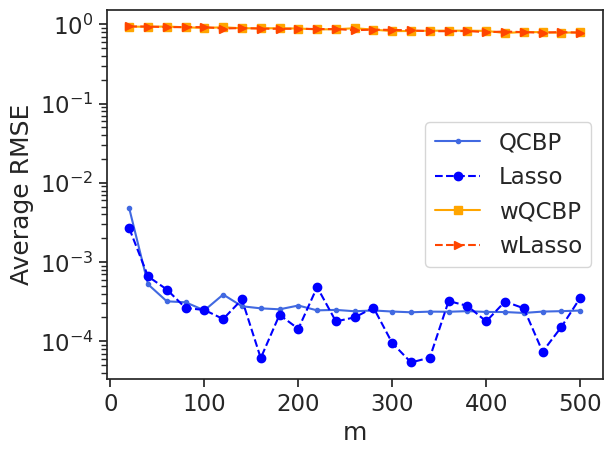

In [41]:
plt.plot(nb_samples, y_1, 'royalblue', label='QCBP', marker='.')
plt.plot(nb_samples, y_2, 'blue', label='Lasso', marker='o', linestyle='--')
plt.plot(nb_samples, y_3, 'orange', label='wQCBP', marker='s')
plt.plot(nb_samples, y_4, 'orangered', label='wLasso', marker='>', linestyle='--')
plt.xlabel('m')
plt.ylabel('Average RMSE')
plt.yscale('log')
#plt.title('Least-squares, d={}, S=HC'.format(d))
plt.legend()
plt.show()

## Custom solvers (testing LS solver from scipy)

In [ ]:
from scipy.linalg import lstsq

In [ ]:
def scipy_ls(A, b, **kwargs):
  x, _, _, _ = lstsq(A, b, lapack_driver='gelss')
  return x

In [ ]:
def get_average_custom(m, dim=3, simuls=5, basis='total-order', ord=4):
  errors = np.array([])
  my_param_list = [eq.Parameter(distribution='uniform', order=ord, lower=-1.0, upper=1.0) for i in range(dim)]

  for j in range(simuls):
    if basis == 'hyperbolic-cross':
      my_basis = eq.Basis(basis, orders=[ord for _ in range(dim)])
    else:
      my_basis = eq.Basis(basis)

    X_train = np.random.uniform(-1, 1, size=(m, dim))
    y_train = eq.evaluate_model(X_train, ed_diff_function)
    my_poly = eq.Poly(my_param_list, my_basis, method='custom-solver',
            sampling_args={'mesh':'user-defined', 'sample-points':X_train, 'sample-outputs':y_train},
              solver_args={'solve':scipy_ls,'verbose':False})
    my_poly.set_model()

    test_pts = np.random.uniform(-1, 1, size=(1000, dim))
    test_evals = eq.evaluate_model(test_pts, ed_diff_function)
    train_r2, test_r2 = my_poly.get_polyscore(X_test=test_pts, y_test=test_evals, metric='rmse')
    train_r2, test_r2

    errors = np.append(errors, test_r2)

  return np.mean(errors)

In [ ]:
d = 8

In [ ]:
def ed_diff_function(y):
  return exp(-1/(2*d) * np.sum(y))

In [ ]:
s_TD = [eq.basis.Basis('total-order', orders=[j for i in range(d)]).get_cardinality() for j in range(1,6)]

In [ ]:
s_TD

[9, 45, 165, 495, 1287]

In [ ]:
Y = []

for a in [1, 1.25, 1.5, 2]:
  y = []
  for s in s_TD:
    y.append(get_average_custom(int(a*s), dim=d, ord=s_TD.index(s)))
  Y.append(y)

In [ ]:
y_log = []
for s in s_TD:
  y_log.append(get_average_custom(int(s*log(s)), dim=d, ord=s_TD.index(s)))
Y.append(y_log)

In [ ]:
y_sq = []
for s in s_TD:
  y_sq.append(get_average_custom(int(0.5 * s**2), 'least-squares', dim=d, ord=s_TD.index(s)))
Y.append(y_sq)

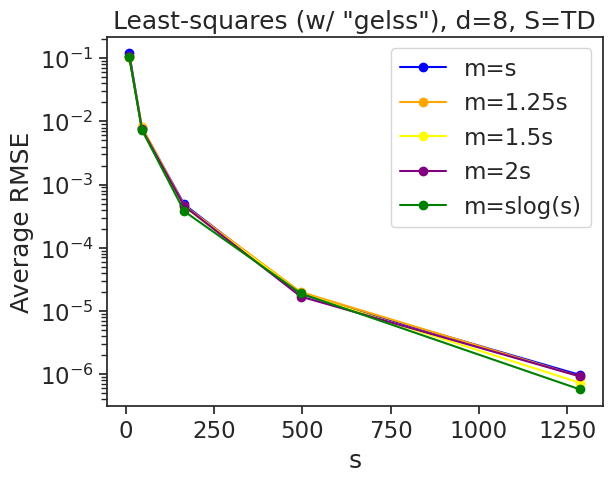

In [ ]:
color = ['blue', 'orange', 'yellow', 'purple', 'green']
label = ['m=s', 'm=1.25s','m=1.5s', 'm=2s', 'm=slog(s)']
for i in range(len(Y)):
  plt.plot(s_TD, Y[i], color[i], label=label[i], marker='o')
  plt.xlabel('s')
  plt.ylabel('Average RMSE')
  plt.yscale('log')
  plt.title('Least-squares (w/ "gelss"), d={}, S=TD'.format(d))
plt.legend()
plt.show()